# Testing different artefact correction algorithms
Evaluate different artefact correction: 1) no correction; 2) Kubios artefact method and 3) Remove beats that deviate 20% from the median (11 samples). Test how different artifact correction methods affetec HRV metrics.
- Time-Domain: RMSSD in a 10 sec window
- Frequency-Domain: LF and HF in 120 sec window


In [3]:
import sys
# mac
sys.path.append('/Users/tiagorodrigues/Documents/GitHub/NeuroKit')

import scipy
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import neurokit2 as nk
import matplotlib as mat

from pathlib import Path

1) Case study: *20200405-TR-FWv2.txt* , from rest to exercise
### 1.1) No artefact correction  

In [4]:
# NO ARTEFACT CORRECTION
# Load ECG session
pathname = r"/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data"
activity = "Activities"
record = "20200405-TR-FWv2.txt"
pathname + "/" + activity + "/" + record

f = open(pathname + "/" + activity + "/" + record, 'r')
ecg = f.readlines()[4:]
f.close()

sampling_rate = 250

# Window size for epoches in seconds
time_window = 10
freq_window = 120

# Clean ECG (no pre-processing method using ASI)
ecg_cleaned = nk.ecg_clean(ecg,sampling_rate=sampling_rate, method='kalidas')


# R-peaks detection
instant_peaks, rpeaks_nocorrection, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned, sampling_rate=sampling_rate, correct_artifacts=False)
rate = nk.signal_rate(rpeaks_nocorrection,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate})

                                    
# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal for 10sec and 2min windows
ecg_epochs_time = nk.epochs_create(signals, sampling_rate = 250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate = 250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_nocorrection10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate = 250)
hrv_epoches_nocorrection120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate = 250)

### 1.2) Kubios: Lipponen & Tarvainen (2019) 

In [5]:
# Kubios: Lipponen & Tarvainen (2019) 
# R-peaks detection
instant_peaks, rpeaks_kubios, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned, sampling_rate=sampling_rate, methodcorrect='kubios',correct_artifacts=True)
rate = nk.signal_rate(rpeaks_kubios,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate})
                                    
# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal
ecg_epochs_time = nk.epochs_create(signals, sampling_rate=250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate=250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_correctionkubios10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate = 250)
hrv_epoches_correctionkubios120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate = 250)

### 1.3) Remove RR-intervals based on 20% relative difference

In [6]:
# Deviation 20% from the mean
# R-peaks detection
instant_peaks, rpeaks_20 = nk.ecg_peaks(ecg_cleaned=ecg_cleaned, sampling_rate=sampling_rate, methodcorrect='neurokit', correct_artifacts=True)
rate = nk.signal_rate(rpeaks_20,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate})

# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal
ecg_epochs_time = nk.epochs_create(signals, sampling_rate=250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate=250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_correctionmedian10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate=250)
hrv_epoches_correctionmedian120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate=250)

In [7]:
rpeaks_kubios

{'ECG_R_Peaks': array([    25,    253,    460, ..., 502789, 502923, 503055])}

{'ECG_R_Peaks': array([    25,    253,    460, ..., 502789, 502923, 503055])}

In [8]:
rpeaks_20

{'ECG_R_Peaks': [25,
  253,
  456,
  668,
  843,
  1047,
  1188,
  1285,
  1335,
  1385,
  1442,
  1496,
  1551,
  1609,
  1662,
  1719,
  1781,
  1845,
  1911,
  1986,
  2069,
  2148,
  2230,
  2391,
  2553,
  2713,
  2868,
  3020,
  3168,
  3316,
  3459,
  3600,
  3742,
  3884,
  4027,
  4175,
  4331,
  4499,
  4680,
  4880,
  5083,
  5281,
  5486,
  5692,
  5882,
  6076,
  6265,
  6448,
  6638,
  6828,
  7019,
  7210,
  7404,
  7598,
  7782,
  7957,
  8131,
  8303,
  8468,
  8629,
  8795,
  8957,
  9120,
  9284,
  9445,
  9610,
  9770,
  9933,
  10100,
  10266,
  10432,
  10594,
  10758,
  10919,
  11082,
  11246,
  11415,
  11593,
  11781,
  11964,
  12139,
  12312,
  12486,
  12671,
  12849,
  13020,
  13193,
  13360,
  13523,
  13687,
  13850,
  14016,
  14186,
  14361,
  14548,
  14747,
  14947,
  15140,
  15339,
  15530,
  15715,
  15897,
  16073,
  16252,
  16428,
  16599,
  16784,
  16962,
  17134,
  17298,
  17463,
  17629,
  17795,
  17965,
  18142,
  18325,
  18506,
  1869

{'ECG_R_Peaks': [25,
  253,
  456,
  668,
  843,
  1047,
  1188,
  1285,
  1335,
  1385,
  1442,
  1496,
  1551,
  1609,
  1662,
  1719,
  1781,
  1845,
  1911,
  1986,
  2069,
  2148,
  2230,
  2391,
  2553,
  2713,
  2868,
  3020,
  3168,
  3316,
  3459,
  3600,
  3742,
  3884,
  4027,
  4175,
  4331,
  4499,
  4680,
  4880,
  5083,
  5281,
  5486,
  5692,
  5882,
  6076,
  6265,
  6448,
  6638,
  6828,
  7019,
  7210,
  7404,
  7598,
  7782,
  7957,
  8131,
  8303,
  8468,
  8629,
  8795,
  8957,
  9120,
  9284,
  9445,
  9610,
  9770,
  9933,
  10100,
  10266,
  10432,
  10594,
  10758,
  10919,
  11082,
  11246,
  11415,
  11593,
  11781,
  11964,
  12139,
  12312,
  12486,
  12671,
  12849,
  13020,
  13193,
  13360,
  13523,
  13687,
  13850,
  14016,
  14186,
  14361,
  14548,
  14747,
  14947,
  15140,
  15339,
  15530,
  15715,
  15897,
  16073,
  16252,
  16428,
  16599,
  16784,
  16962,
  17134,
  17298,
  17463,
  17629,
  17795,
  17965,
  18142,
  18325,
  18506,
  1869

## Time and Frequency domain features

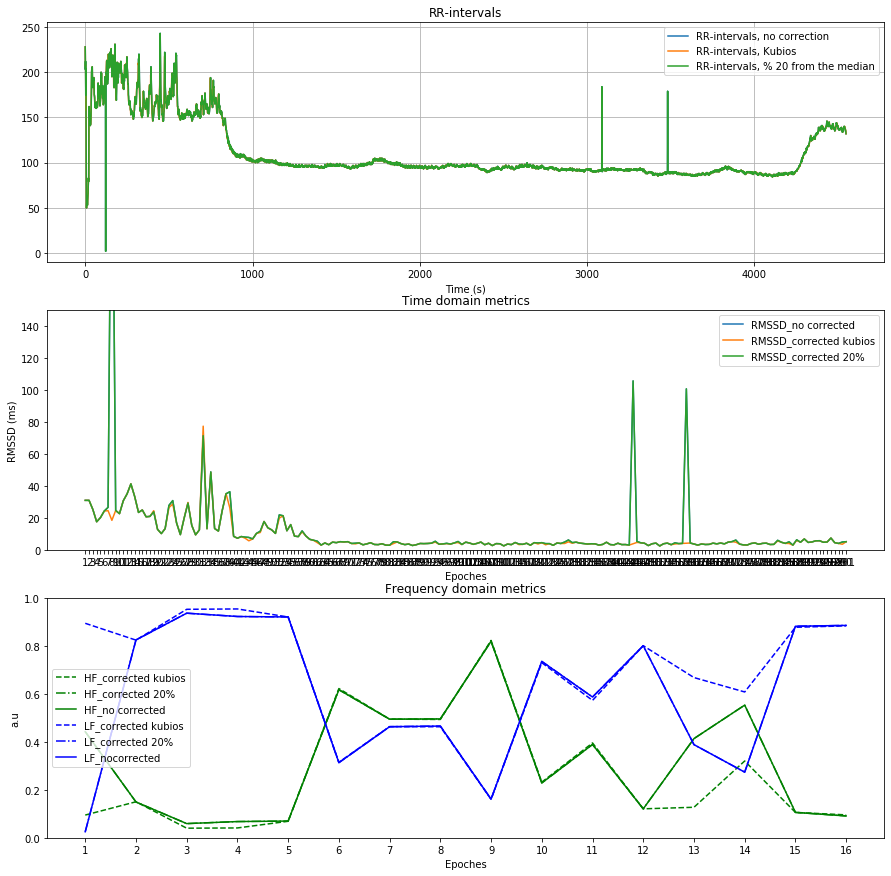

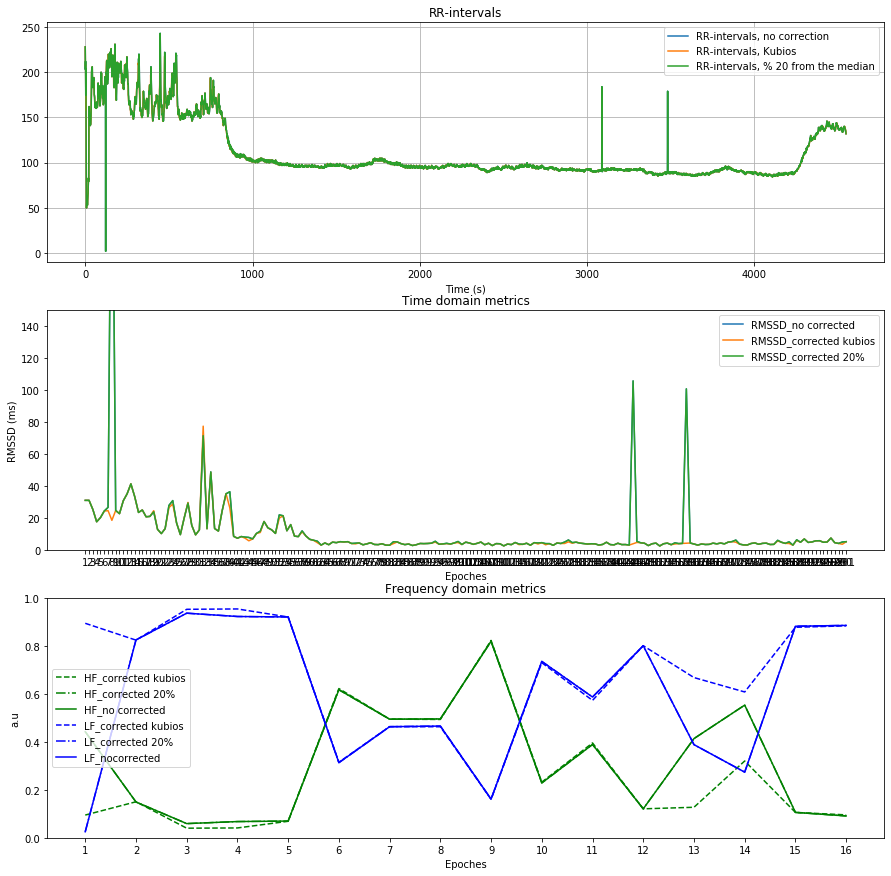

In [9]:
# Plot RR-intervals and corrected 
fig1, ax1 = plt.subplots(figsize=(15,15));
plt.subplot(3,1,1)
plt.plot(np.diff(rpeaks_nocorrection['ECG_R_Peaks']),label='RR-intervals, no correction')
plt.plot(np.diff(rpeaks_kubios['ECG_R_Peaks']),label ='RR-intervals, Kubios')
plt.plot(np.diff(rpeaks_20['ECG_R_Peaks']),label='RR-intervals, % 20 from the median')
plt.xlabel('Time (s)')
plt.grid()
plt.title('RR-intervals')
plt.legend()


# Epoches of 10 sec - Time Domain
# set first values as 0
hrv_epoches_nocorrection10['HRV_RMSSD'][0] = hrv_epoches_nocorrection10['HRV_RMSSD'][1]  
hrv_epoches_correctionkubios10['HRV_RMSSD'][0] = hrv_epoches_correctionkubios10['HRV_RMSSD'][1]  
hrv_epoches_correctionmedian10['HRV_RMSSD'][0] = hrv_epoches_correctionkubios10['HRV_RMSSD'][1]  

plt.subplot(3,1,2)
plt.plot(hrv_epoches_nocorrection10['HRV_RMSSD'],label='RMSSD_no corrected')
plt.plot(hrv_epoches_correctionkubios10['HRV_RMSSD'],label='RMSSD_corrected kubios')
plt.plot(hrv_epoches_correctionmedian10['HRV_RMSSD'],label='RMSSD_corrected 20%')
plt.ylim([0, 150]);
plt.xlabel('Epoches')
plt.ylabel('RMSSD (ms)')
plt.title('Time domain metrics')
plt.legend();


# Epoches of 120 sec - Freq Domain
plt.subplot(3,1,3)
plt.plot(hrv_epoches_correctionkubios120['HRV_HFn'],'g--',label='HF_corrected kubios')
plt.plot(hrv_epoches_correctionmedian120['HRV_HFn'],'g-.',label='HF_corrected 20%')
plt.plot(hrv_epoches_nocorrection120['HRV_HFn'],'g',label ='HF_no corrected' )
plt.plot(hrv_epoches_correctionkubios120['HRV_LFn'],'b--',label= 'LF_corrected kubios')
plt.plot(hrv_epoches_correctionmedian120['HRV_LFn'],'b-.',label= 'LF_corrected 20%')
plt.plot(hrv_epoches_nocorrection120['HRV_LFn'],'b',label = 'LF_nocorrected')
plt.ylim([0, 1]);
plt.xlabel('Epoches')
plt.title('Frequency domain metrics')
plt.ylabel('a.u')
plt.legend();


### Results
- missed detected beats cause sharp artefacts in the Time-Domain metrics.
- missed beats wrongly classified as ectopic are interpolated, resulting in artefacts in the time-domain. The effects of the interpolation in the frequency metrics is not significative.
- kubios vs corrected20% showed similar results for time and frequency metrics, appart from the artefact at *t = 3000 s*.

2) Case study: *20200508-SS-Belt.txt* , from rest - exercise - rest


In [10]:
def open_file(typeactivity,dayactivity, show):
    # Input: data file name
    # e.g  "Activities/20200508-SS-Belt.txt"
        
    # name of the file
    data_folder = Path("/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/")  
    file_to_open = os.path.join(data_folder, typeactivity, dayactivity)

    print(file_to_open)
        
    # import header json file
    f = open(file_to_open) 
    line = f.readline()
    line = f.readline(1)
    line = f.readline()
    header = line.replace("\n", "")
    
    # import ecg data
    ecg_fieldwiz = np.genfromtxt(file_to_open) 
    time = np.arange(0, len(ecg_fieldwiz)/250, 1/250)
    
    # plot ECG
    if show == 1:
        plt.figure(figsize=(10, 5), dpi=100)
        plt.plot(time,ecg_fieldwiz)
        plt.ylabel("ECG (16-bit)")
        plt.xlabel("Time (s)")
        plt.title('Raw ECG', fontdict=None, loc='center', pad=None)
    
    return header,ecg_fieldwiz,time

In [11]:
# NO ARTEFACT CORRECTION
# Load ECG session
header,ecg,time = open_file("Activities","20200508-SS-Belt.txt",0)
sampling_rate = 250

# Window size for epoches
time_window = 10
freq_window = 120

# Clean ECG (no pre-processing method using ASI)
ecg_cleaned = nk.ecg_clean(ecg,sampling_rate=sampling_rate, method='asi')


# R-peaks detection
instant_peaks, rpeaks_nocorrection, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned,sampling_rate=sampling_rate,method='asi',correct_artifacts=False)
rate = nk.signal_rate(rpeaks_nocorrection,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
quality = nk.ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=sampling_rate)
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate,"ECG_Quality": quality})
                                    
# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal for 10sec and 2min windows
ecg_epochs_time = nk.epochs_create(signals, sampling_rate = 250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate = 250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_nocorrection10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate = 250)
hrv_epoches_nocorrection120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate = 250)

#========================
# Kubios: Lipponen & Tarvainen (2019) 
# R-peaks detection
instant_peaks, rpeaks_kubios, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned,sampling_rate=sampling_rate,method='asi',correct_artifacts=True,methodcorrect='kubios')
rate = nk.signal_rate(rpeaks_kubios,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
quality = nk.ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=sampling_rate)
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate,"ECG_Quality": quality})
                                    
# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal
ecg_epochs_time = nk.epochs_create(signals, sampling_rate=250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate=250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_correctionkubios10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate = 250)
hrv_epoches_correctionkubios120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate = 250)

#========================
# Deviation 20% from the mean
# R-peaks detection
instant_peaks, rpeaks_20, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned,sampling_rate=sampling_rate,method='asi',correct_artifacts=True,methodcorrect='asi')
rate = nk.signal_rate(rpeaks_20,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
quality = nk.ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=sampling_rate)
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate,"ECG_Quality": quality})

# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal
ecg_epochs_time = nk.epochs_create(signals, sampling_rate=250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate=250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_correctionmedian10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate=250)
hrv_epoches_correctionmedian120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate=250)

/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200508-SS-Belt.txt
/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200508-SS-Belt.txt


ValueError: NeuroKit error: ecg_clean(): 'method' should be one of 'neurokit', 'biosppy', 'pamtompkins1985', 'hamilton2002', 'elgendi2010', 'engzeemod2012'.

ValueError: NeuroKit error: ecg_clean(): 'method' should be one of 'neurokit', 'biosppy', 'pamtompkins1985', 'hamilton2002', 'elgendi2010', 'engzeemod2012'.

In [ ]:
# Plot RR-intervals and corrected 
fig1, ax1 = plt.subplots(figsize=(15,15));
plt.subplot(3,1,1)
plt.plot(np.diff(rpeaks_nocorrection['ECG_R_Peaks']),label='RR-intervals, no correction')
plt.plot(np.diff(rpeaks_kubios['ECG_R_Peaks']),label ='RR-intervals, Kubios')
plt.plot(np.diff(rpeaks_20['ECG_R_Peaks']),label='RR-intervals, % 20 from the median')
plt.xlabel('Time (s)')
plt.grid()
plt.title('RR-intervals')
plt.legend()


# Epoches of 10 sec - Time Domain
# set first values as 0
hrv_epoches_nocorrection10['HRV_RMSSD'][0] = hrv_epoches_nocorrection10['HRV_RMSSD'][1]  
hrv_epoches_correctionkubios10['HRV_RMSSD'][0] = hrv_epoches_correctionkubios10['HRV_RMSSD'][1]  
hrv_epoches_correctionmedian10['HRV_RMSSD'][0] = hrv_epoches_correctionkubios10['HRV_RMSSD'][1]  

plt.subplot(3,1,2)
plt.plot(hrv_epoches_nocorrection10['HRV_RMSSD'],label='RMSSD_no corrected')
plt.plot(hrv_epoches_correctionkubios10['HRV_RMSSD'],label='RMSSD_corrected kubios')
plt.plot(hrv_epoches_correctionmedian10['HRV_RMSSD'],label='RMSSD_corrected 20%')
plt.ylim([0, 150]);
plt.xlabel('Epoches')
plt.ylabel('RMSSD (ms)')
plt.title('Time domain metrics')
plt.legend();


# Epoches of 120 sec - Freq Domain
plt.subplot(3,1,3)
plt.plot(hrv_epoches_correctionkubios120['HRV_HFn'],'g--',label='HF_corrected kubios')
plt.plot(hrv_epoches_correctionmedian120['HRV_HFn'],'g-.',label='HF_corrected 20%')
plt.plot(hrv_epoches_nocorrection120['HRV_HFn'],'g',label ='HF_no corrected' )
plt.plot(hrv_epoches_correctionkubios120['HRV_LFn'],'b--',label= 'LF_corrected kubios')
plt.plot(hrv_epoches_correctionmedian120['HRV_LFn'],'b-.',label= 'LF_corrected 20%')
plt.plot(hrv_epoches_nocorrection120['HRV_LFn'],'b',label = 'LF_nocorrected')
plt.ylim([0, 1]);
plt.xlabel('Epoches')
plt.title('Frequency domain metrics')
plt.ylabel('a.u')
plt.legend(loc='upper right');


3) Case study: *20200416-TR-FWv2series.txt* , during rest

In [ ]:
# NO ARTEFACT CORRECTION
# Load ECG session
header,ecg,time = aux.open_file("Experiments","20200416-TR-FWv2series.txt",0)
sampling_rate = 250

# Window size for epoches
time_window = 10
freq_window = 120

# Clean ECG (no pre-processing method using ASI)
ecg_cleaned = nk.ecg_clean(ecg,sampling_rate=sampling_rate, method='asi')

# R-peaks detection
instant_peaks, rpeaks_nocorrection, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned,sampling_rate=sampling_rate,method='asi',correct_artifacts=False)
rate = nk.signal_rate(rpeaks_nocorrection,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
quality = nk.ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=sampling_rate)
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate,"ECG_Quality": quality})
                                    
# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal for 10sec and 2min windows
ecg_epochs_time = nk.epochs_create(signals, sampling_rate = 250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate = 250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_nocorrection10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate = 250)
hrv_epoches_nocorrection120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate = 250)

#========================
# Kubios: Lipponen & Tarvainen (2019) 
# R-peaks detection
instant_peaks, rpeaks_kubios, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned,sampling_rate=sampling_rate,method='asi',correct_artifacts=True,methodcorrect='kubios')
rate = nk.signal_rate(rpeaks_kubios,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
quality = nk.ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=sampling_rate)
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate,"ECG_Quality": quality})
                                    
# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal
ecg_epochs_time = nk.epochs_create(signals, sampling_rate=250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate=250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_correctionkubios10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate = 250)
hrv_epoches_correctionkubios120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate = 250)

#========================
# Deviation 20% from the mean
# R-peaks detection
instant_peaks, rpeaks_20, = nk.ecg_peaks(ecg_cleaned=ecg_cleaned,sampling_rate=sampling_rate,method='asi',correct_artifacts=True,methodcorrect='asi')
rate = nk.signal_rate(rpeaks_20,sampling_rate=sampling_rate,desired_length=len(ecg_cleaned))
quality = nk.ecg_quality(ecg_cleaned, rpeaks=None, sampling_rate=sampling_rate)
signals = pd.DataFrame({"ECG_Raw": ecg,"ECG_Clean": ecg_cleaned,"ECG_Rate": rate,"ECG_Quality": quality})

# Have the right struture for epochs
signals = pd.concat([signals, instant_peaks], axis=1)

# Create epochs of the ecg signal
ecg_epochs_time = nk.epochs_create(signals, sampling_rate=250, epochs_end = time_window)
ecg_epochs_freq = nk.epochs_create(signals, sampling_rate=250, epochs_end = freq_window)

# Compute HRV metrics over the ecg_epochs
hrv_epoches_correctionmedian10 = nk.ecg_intervalrelated(ecg_epochs_time,sampling_rate=250)
hrv_epoches_correctionmedian120 = nk.ecg_intervalrelated(ecg_epochs_freq,sampling_rate=250)


In [ ]:
# Plot RR-intervals and corrected 
fig1, ax1 = plt.subplots(figsize=(15,15));
plt.subplot(3,1,1)
plt.plot(np.diff(rpeaks_nocorrection['ECG_R_Peaks']),label='RR-intervals, no correction')
plt.plot(np.diff(rpeaks_kubios['ECG_R_Peaks']),label ='RR-intervals, Kubios')
plt.plot(np.diff(rpeaks_20['ECG_R_Peaks']),label='RR-intervals, % 20 from the median')
plt.xlabel('Time (s)')
plt.grid()
plt.title('RR-intervals')
plt.legend()


# Epoches of 10 sec - Time Domain
# set first values as 0
hrv_epoches_nocorrection10['HRV_RMSSD'][0] = hrv_epoches_nocorrection10['HRV_RMSSD'][1]  
hrv_epoches_correctionkubios10['HRV_RMSSD'][0] = hrv_epoches_correctionkubios10['HRV_RMSSD'][1]  
hrv_epoches_correctionmedian10['HRV_RMSSD'][0] = hrv_epoches_correctionkubios10['HRV_RMSSD'][1]  

plt.subplot(3,1,2)
plt.plot(hrv_epoches_nocorrection10['HRV_RMSSD'],label='RMSSD_no corrected')
plt.plot(hrv_epoches_correctionkubios10['HRV_RMSSD'],label='RMSSD_corrected kubios')
plt.plot(hrv_epoches_correctionmedian10['HRV_RMSSD'],label='RMSSD_corrected 20%')
plt.ylim([0, 150]);
plt.xlabel('Epoches')
plt.ylabel('RMSSD (ms)')
plt.title('Time domain metrics')
plt.legend();


# Epoches of 120 sec - Freq Domain
plt.subplot(3,1,3)
plt.plot(hrv_epoches_correctionkubios120['HRV_HFn'],'g--',label='HF_corrected kubios')
plt.plot(hrv_epoches_correctionmedian120['HRV_HFn'],'g-.',label='HF_corrected 20%')
plt.plot(hrv_epoches_nocorrection120['HRV_HFn'],'g',label ='HF_no corrected' )
plt.plot(hrv_epoches_correctionkubios120['HRV_LFn'],'b--',label= 'LF_corrected kubios')
plt.plot(hrv_epoches_correctionmedian120['HRV_LFn'],'b-.',label= 'LF_corrected 20%')
plt.plot(hrv_epoches_nocorrection120['HRV_LFn'],'b',label = 'LF_nocorrected')
plt.ylim([0, 1]);
plt.xlabel('Epoches')
plt.title('Frequency domain metrics')
plt.ylabel('a.u')
plt.legend();
